# Raster plot with stimulus
## Import of modules
We begin with import of the modules we want to use

In [1]:
import numpy as np # numerical python gives us matlab functions
import matplotlib.pyplot as plt # plotting functions
# we want our plots to be visualized inside this notebook
%matplotlib notebook 
import quantities as pq # physical quantities is nice to use

/home/svenni/apps/anaconda3/envs/expipe/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Remember, that if you want help you can write a command and press tab, if that does not work put a question mark at the end of the function you want help with, like shown below

In [2]:
plt.plot?

we make a syntetic spiketrain

In [3]:
exp_duration = 10 * pq.s # experiment duration
n_spikes = 100 # number of spikes
sptr = np.random.random(n_spikes) * exp_duration # 100 random numbers between 0 and exp_duration
print sptr # write info below

[  3.40944606e+00   8.07971560e+00   3.80713480e-01   5.42151280e+00
   6.87385435e+00   4.65038823e+00   1.06518344e-01   5.95450656e+00
   4.85355071e+00   2.72370371e-01   1.86932072e+00   5.31364704e+00
   8.94475082e-02   1.13002164e+00   8.75762977e+00   1.17115605e+00
   1.68814010e+00   8.11891452e+00   9.82532480e-01   9.10312639e+00
   4.19190551e-01   7.18509380e+00   6.51911409e+00   2.54798069e+00
   8.42636151e-02   1.86833945e+00   5.86517705e-03   3.47972299e+00
   1.03193493e+00   5.80266053e+00   3.74582083e+00   7.40086493e+00
   2.76449688e+00   2.68042028e+00   2.59292493e+00   6.44726851e+00
   2.95480848e+00   7.38421347e+00   3.82298431e+00   4.04566245e+00
   3.64767913e-01   7.51771920e-01   1.22050274e+00   9.00082604e+00
   9.67932111e+00   6.60381442e-01   8.40463746e+00   4.34750322e+00
   8.13459625e+00   7.65761138e+00   5.87910746e+00   4.91572512e+00
   3.63655450e+00   1.97523523e+00   3.04695358e+00   4.02908665e+00
   6.23486055e+00   9.84152800e+00

we make a syntetic stimulus

In [4]:
# define stimulus specifications
pulse_freq = 10 * pq.Hz
n_trials = 5
stim_phase = 50 * pq.ms

stim_trials = [] # make an empty list which we will fill later
stim_durations = [] # make an empty list which we will fill later
stim_start = []
stim_stop = []
for trial in range(n_trials): # make trials
    start_t = exp_duration / n_trials * trial + 1 * pq.s
    stop_t = exp_duration / n_trials * (1+trial)
    stims = np.arange(start_t, stop_t , 1/pulse_freq)
    stim_trials.append(stims * pq.s) # append fills the empty list
    stim_durations.append([stim_phase.magnitude] * len(stims) * stim_phase.units) # append fills the empty list
    stim_start.append(start_t)
    stim_stop.append(stop_t)
print stim_trials, '\n', stim_durations # write info below

[array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9]) * s, array([ 3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9]) * s, array([ 5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9]) * s, array([ 7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9]) * s, array([ 9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9]) * s] 
[array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms, array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms, array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms, array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms, array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.]) * ms]


<IPython.core.display.Javascript object>


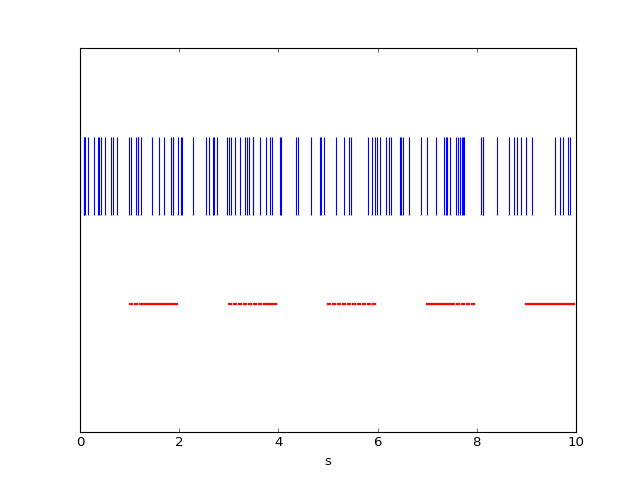

In [5]:
fig, ax = plt.subplots() # make a figure with axes
dim = exp_duration.dimensionality # make sure time has the same dimension in all temporal variables
ax.scatter(sptr, np.ones(len(sptr)), marker='|', s=5000) # add spikes to the axes
ax.set_xlim(0, exp_duration.magnitude)
ax.set_ylim(0.99, 1.005) # zoom in
ax.set_yticks([])
ax.set_xlabel(dim)
for trial in range(n_trials):
    for stim, duration in zip(stim_trials[trial].rescale(dim), stim_durations[trial].rescale(dim)):
        ax.plot([stim, stim+duration], [0.995, 0.995], lw=2, color='r') # add stimulus lines to axes

Now we want to allign spikes relative to stimulus and plot each trial

In [6]:
trial_vec = []
sp_vec = []
t_pre = exp_duration/2.
t_post = exp_duration/2.
for trial in range(n_trials):
    for sp in sptr[(sptr >= stim_start[trial] - t_pre) & (sptr <= stim_start[trial] + t_post)]:
        sp_vec.append(sp-stim_start[trial])
        trial_vec.append(trial)

The plotting is done similar as the previous plot

**Assignment:** add y-label with set_ylabel counting each trial, and add a legend with plt.legend

<IPython.core.display.Javascript object>


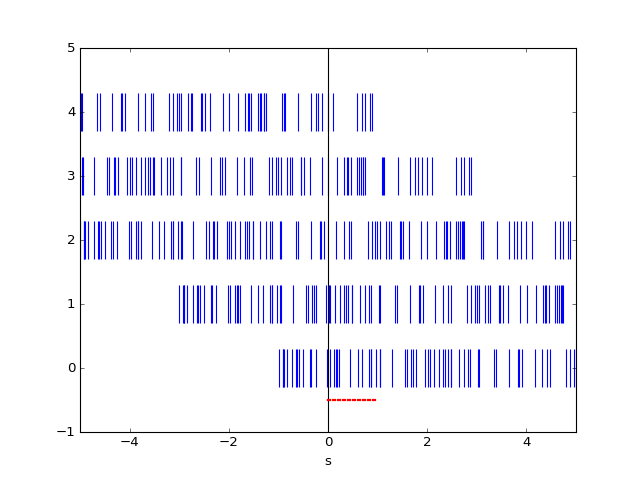

In [7]:
fig, ax = plt.subplots() # make a figure with axes
line_height = 6000./n_trials
ax.scatter(sp_vec, trial_vec, marker='|', s=line_height)
for stim, duration in zip(stim_trials[0].rescale(dim), stim_durations[0].rescale(dim)):
    ax.plot([stim-stim_start[0], stim+duration-stim_start[0]], [-.5, -.5], lw=2, color='r') # add stimulus lines to axes
ax.set_xlim(-t_pre, t_post)
ax.axvspan(0, 0, color='k')
ax.set_xlabel(dim)

**Assignment:** the first and the last spiketrains starts and stops respectively well inside the x-axis bounds giving the impression that there are no spikes near the edges here. Moreover we can not be sure that some spikes are repeatedly plottet in several trials. Change t_pre and t_post such that both these issues are prevented. 

**Assignment:** make a similar figure as above, however now we want to se spikes relative to each pulse in each trial

**Assignment:** Add a histogram above the plot you made, see example below

<IPython.core.display.Javascript object>


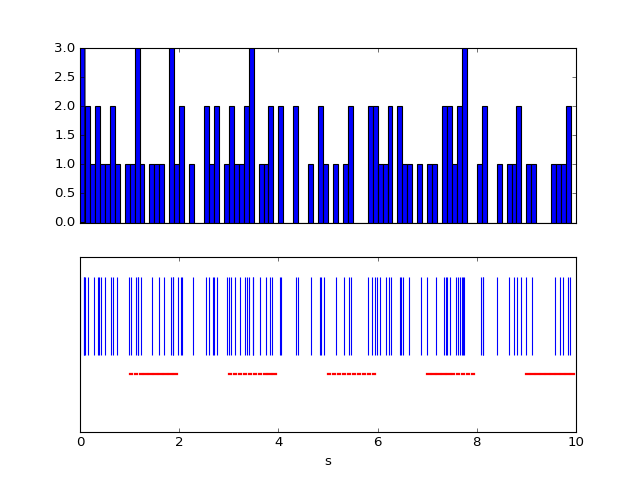

In [8]:
fig, axs = plt.subplots(2, 1, sharex=True) # make a figure with axes
binsize = 100 * pq.ms
start = 0 * pq.s
binsize = binsize.rescale(dim)
bins = np.arange(start.rescale(dim), exp_duration.rescale(dim)+binsize, binsize)
axs[0].hist(sptr.rescale(dim), bins=bins)

axs[1].scatter(sptr, np.ones(len(sptr)), marker='|', s=5000) # add spikes to the axes
axs[1].set_xlim(0, exp_duration.magnitude)
axs[1].set_ylim(0.99, 1.005) # zoom in
axs[1].set_yticks([])
axs[1].set_xlabel(dim)
for trial in range(n_trials):
    for stim, duration in zip(stim_trials[trial].rescale(dim), stim_durations[trial].rescale(dim)):
        axs[1].plot([stim, stim+duration], [0.995, 0.995], lw=2, color='r') # add stimulus lines to axes